# Churn Prediction Project (Classification)

## Packages and setup

In [126]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Introduction
For this Churn Prediction Project, we will be analysing Mock Data from a Telco Company in order to predict whether a customer will stop doing business with the Telco Company. This is known as Churn rate / Attrition rate. There are many features involved and we have to determine which features have a higher chance to predict churn rate so that the Telco Company can come up with strategies to prevent customer churn.

## 1.1 Let us start with Reading data and initial processing

In [127]:
# reading csv file into dataframe
cust_df = pd.read_csv('Mini project 3 Data.csv')

# To look at the number of rows and columns in the dataset
cust_df.shape

# To have a glance of all columns in the dataset
pd.set_option('display.max_columns', None)
cust_df

(51047, 58)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


### **Things to consider**:

1. How to address null values / outliers?
2. What columns are not helpful in predicting our key churn drivers? Drop the columns?
3. How to normalize the data?


In [128]:
# To check how many null values in each column
cust_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

## 1.2 Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

Features such as Monthly Revenue, Monthly Minutes, PercChangeMinutes are very crucial to predict Churn as they measure the usage of the customers. Hence, we suggest to drop rows if the values are null in these features. 

In [129]:
# Removing Null values in major feature such as MonthlyRevenue
cust_df.dropna(subset=['MonthlyRevenue','MonthlyMinutes','PercChangeMinutes','PercChangeRevenues'], inplace=True)

In [130]:
cust_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue                 0
MonthlyMinutes                 0
TotalRecurringCharge           0
DirectorAssistedCalls          0
OverageMinutes                 0
RoamingCalls                   0
PercChangeMinutes              0
PercChangeRevenues             0
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [131]:
# Replacing null values: mode for categorical data, median for numerical integer data.
cust_df['ServiceArea'].mode()

cust_df['Handsets'].median()

cust_df['HandsetModels'].median()

cust_df['CurrentEquipmentDays'].median()

0    NYCBRO917
Name: ServiceArea, dtype: object

1.0

1.0

329.0

In [132]:
# Replace all the nan with mode
cust_df['ServiceArea'] = cust_df['ServiceArea'].fillna(cust_df['ServiceArea'].mode()[0])

cust_df['Handsets'] = cust_df['Handsets'].fillna(cust_df['Handsets'].median())

cust_df['HandsetModels'] = cust_df['HandsetModels'].fillna(cust_df['HandsetModels'].median())

cust_df['CurrentEquipmentDays'] = cust_df['CurrentEquipmentDays'].fillna(cust_df['CurrentEquipmentDays'].median())

In [133]:
# Checking if there are any null values remaining in the above columns
cust_df.isnull().sum()

cust_df.describe()

CustomerID                     0
Churn                          0
MonthlyRevenue                 0
MonthlyMinutes                 0
TotalRecurringCharge           0
DirectorAssistedCalls          0
OverageMinutes                 0
RoamingCalls                   0
PercChangeMinutes              0
PercChangeRevenues             0
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                    0
Handsets                       0
HandsetModels                  0
CurrentEquipmentDays           0
AgeHH1    

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.068000e+04,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,49777.000000,49777.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000
mean,3.201521e+06,58.889657,526.441614,46.913319,0.896931,40.045363,1.235085,-11.547908,-1.191985,6.025142,4.101859,28.372137,1.875284,0.299613,115.154548,25.451995,8.208796,90.805973,67.845953,10.188072,0.012366,1.847287,18.699211,1.531334,1.353788,1.804953,1.558583,379.221527,31.341322,21.150150,0.035418,0.018212,0.052190,4.324763,0.053591
std,1.166497e+05,44.510633,530.026898,23.825705,2.232134,96.675712,9.816539,257.514772,39.574915,9.045350,10.969133,38.918972,5.107338,1.169615,166.635910,35.203554,16.699268,104.900586,92.801883,15.572059,0.596315,5.600395,9.748462,1.225741,0.675788,1.330555,0.906119,252.038628,22.089034,23.925626,0.201585,0.142298,0.308235,3.137111,0.382133
min,3.000002e+06,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100375e+06,33.670000,159.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.500000,3.300000,0.000000,23.300000,11.000000,2.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201112e+06,48.550000,367.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,53.200000,13.700000,2.000000,62.300000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.304655e+06,71.100000,724.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.700000,1.700000,0.300000,154.100000,34.000000,9.300000,121.700000,89.000000,12.700000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,513.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399974e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


#### It does not make sense for Age to be 0, thus suggest to replace these values with mean.

(array([13810.,    44.,  4674.,  9324., 10219.,  8313.,  2259.,   874.,
          231.,    29.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

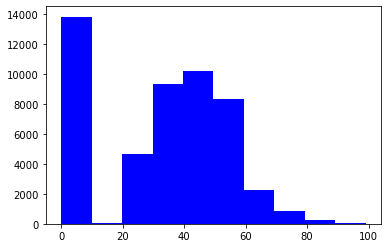

(array([25886.,   178.,  3057.,  5710.,  6896.,  4993.,  1905.,   823.,
          261.,    68.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

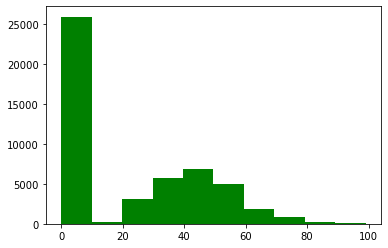

In [134]:
# Distribution of ageHH1 and AgeHH2

plt.hist(cust_df['AgeHH1'],facecolor='blue', bins=10)
plt.show()

plt.hist(cust_df['AgeHH2'],facecolor='green', bins=10)
plt.show()

In [135]:
cust_df['AgeHH1'].replace(to_replace = 0, value = cust_df['AgeHH1'].mean(), inplace=True)
cust_df['AgeHH1'].fillna(value= cust_df['AgeHH1'].mean(), inplace=True)

(array([3.074e+03, 2.095e+04, 8.756e+03, 8.246e+03, 6.261e+03, 1.982e+03,
        9.120e+02, 3.740e+02, 1.080e+02, 1.700e+01]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <BarContainer object of 10 artists>)

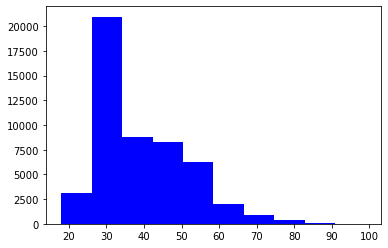

In [136]:
plt.hist(cust_df['AgeHH1'],facecolor='blue', bins=10)
plt.show()

(array([28228.,  5111.,  5006.,  5612.,  3666.,  1637.,   847.,   407.,
          127.,    39.]),
 array([18. , 26.1, 34.2, 42.3, 50.4, 58.5, 66.6, 74.7, 82.8, 90.9, 99. ]),
 <BarContainer object of 10 artists>)

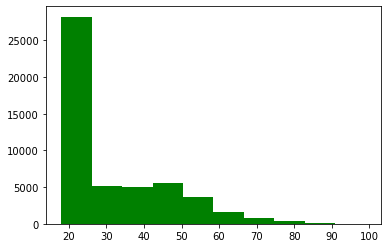

In [137]:
cust_df['AgeHH2'].replace(to_replace = 0, value = cust_df['AgeHH2'].mean(), inplace=True)
cust_df['AgeHH2'].fillna(value= cust_df['AgeHH2'].mean(), inplace=True)

plt.hist(cust_df['AgeHH2'],facecolor='green', bins=10)
plt.show()

In [138]:
cust_df.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.068000e+04,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000,50680.000000
mean,3.201521e+06,58.889657,526.441614,46.913319,0.896931,40.045363,1.235085,-11.547908,-1.191985,6.025142,4.101859,28.372137,1.875284,0.299613,115.154548,25.451995,8.208796,90.805973,67.845953,10.188072,0.012366,1.847287,18.699211,1.531334,1.353788,1.804953,1.558583,379.221527,40.036576,32.149060,0.035418,0.018212,0.052190,4.324763,0.053591
std,1.166497e+05,44.510633,530.026898,23.825705,2.232134,96.675712,9.816539,257.514772,39.574915,9.045350,10.969133,38.918972,5.107338,1.169615,166.635910,35.203554,16.699268,104.900586,92.801883,15.572059,0.596315,5.600395,9.748462,1.225741,0.675788,1.330555,0.906119,252.038628,11.717485,14.660315,0.201585,0.142298,0.308235,3.137111,0.382133
min,3.000002e+06,-6.170000,0.000000,-6.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100375e+06,33.670000,159.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,0.000000,5.300000,0.000000,0.000000,8.500000,3.300000,0.000000,23.300000,11.000000,2.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,205.000000,31.341322,21.150150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201112e+06,48.550000,367.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,1.000000,16.300000,0.000000,0.000000,53.200000,13.700000,2.000000,62.300000,35.700000,5.300000,0.000000,0.300000,16.000000,1.000000,1.000000,1.000000,1.000000,329.000000,36.000000,21.150150,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.304655e+06,71.100000,724.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,3.700000,36.700000,1.700000,0.300000,154.100000,34.000000,9.300000,121.700000,89.000000,12.700000,0.000000,1.300000,24.000000,2.000000,2.000000,2.000000,2.000000,513.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399974e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,384.300000,848.700000,327.300000,66.000000,2692.400000,644.300000,519.300000,2090.700000,1474.700000,411.700000,81.300000,212.700000,61.000000,196.000000,53.000000,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


### 1.3 How many customers had zero monthly revenue?
To remove these rows as monthly revenue is considered a main feature and value of 0 does not make sense in the dataset.

In [139]:
no_of_cust = cust_df['MonthlyRevenue'].where(cust_df['MonthlyRevenue'] <=0 ).count()

print(no_of_cust, "customers had zero monthly revenue.")

6 customers had zero monthly revenue.


In [140]:
# Excluding customers with Negative and 0 Monthly Revenue.
cust_df = cust_df[cust_df["MonthlyRevenue"] > 0]

### To consider for columns with missing values percentage >5%
This is an extra step to perform if we have not treated the null values earlier.

In [141]:
percent_missing = cust_df. isnull(). sum() * 100 / len(cust_df)

percent_missing

CustomerID                   0.0
Churn                        0.0
MonthlyRevenue               0.0
MonthlyMinutes               0.0
TotalRecurringCharge         0.0
DirectorAssistedCalls        0.0
OverageMinutes               0.0
RoamingCalls                 0.0
PercChangeMinutes            0.0
PercChangeRevenues           0.0
DroppedCalls                 0.0
BlockedCalls                 0.0
UnansweredCalls              0.0
CustomerCareCalls            0.0
ThreewayCalls                0.0
ReceivedCalls                0.0
OutboundCalls                0.0
InboundCalls                 0.0
PeakCallsInOut               0.0
OffPeakCallsInOut            0.0
DroppedBlockedCalls          0.0
CallForwardingCalls          0.0
CallWaitingCalls             0.0
MonthsInService              0.0
UniqueSubs                   0.0
ActiveSubs                   0.0
ServiceArea                  0.0
Handsets                     0.0
HandsetModels                0.0
CurrentEquipmentDays         0.0
AgeHH1    

### 1.4 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any
Removing outliers that may skew the data which can affect the modeling performance.

<AxesSubplot:>

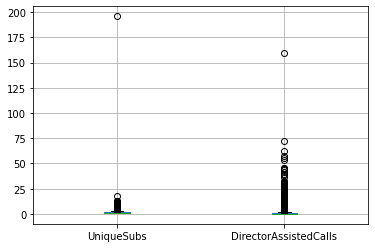

In [142]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

In [143]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Using "quantile" function to identify top 1% outliers

upper_limit = cust_df['UniqueSubs'].quantile(0.99)
lower_limit = cust_df['UniqueSubs'].quantile(0.01)

upper_limit
lower_limit

5.0

1.0

In [144]:
cust_df_remove_out = cust_df[(cust_df['UniqueSubs'] <= 5) & (cust_df['UniqueSubs'] >= 1)]

<AxesSubplot:>

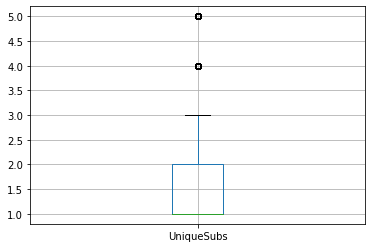

In [145]:
cols=["UniqueSubs"]
cust_df_remove_out.boxplot(column=cols)

In [146]:
upper_limit = cust_df['DirectorAssistedCalls'].quantile(0.99)
lower_limit = cust_df['DirectorAssistedCalls'].quantile(0.01)

upper_limit
lower_limit

9.65

0.0

In [147]:
cust_df_remove_out = cust_df_remove_out[(cust_df_remove_out['DirectorAssistedCalls'] <= 9.65) & (cust_df_remove_out['DirectorAssistedCalls'] >= 0)]

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

<AxesSubplot:>

<AxesSubplot:>

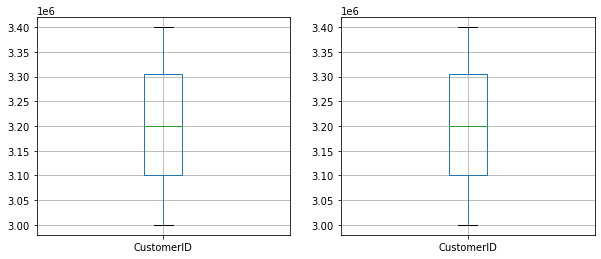

<AxesSubplot:>

<AxesSubplot:>

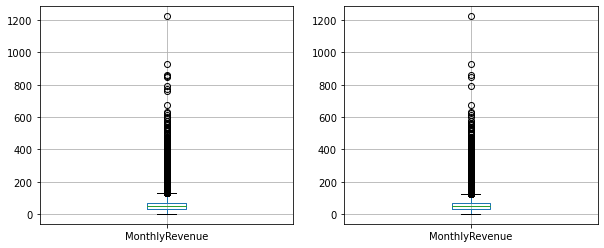

<AxesSubplot:>

<AxesSubplot:>

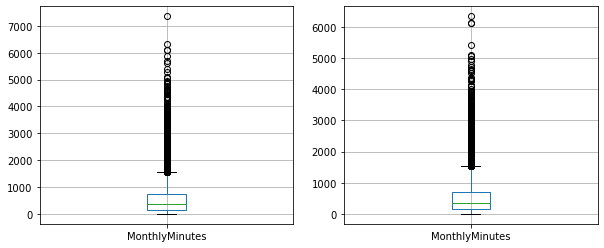

<AxesSubplot:>

<AxesSubplot:>

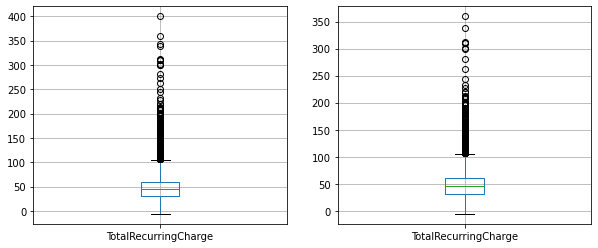

<AxesSubplot:>

<AxesSubplot:>

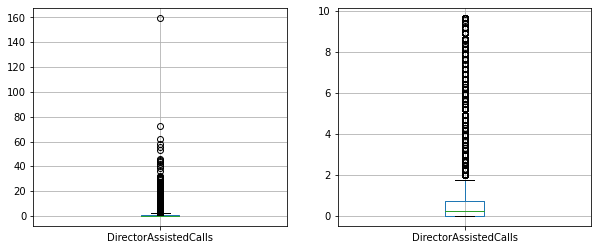

<AxesSubplot:>

<AxesSubplot:>

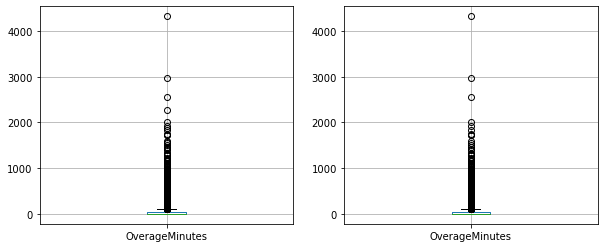

<AxesSubplot:>

<AxesSubplot:>

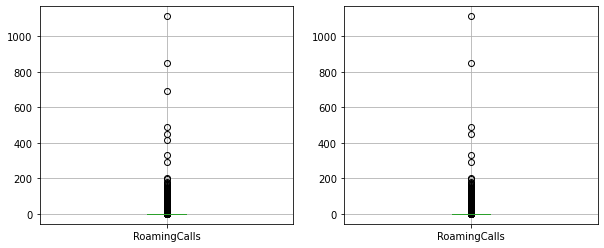

<AxesSubplot:>

<AxesSubplot:>

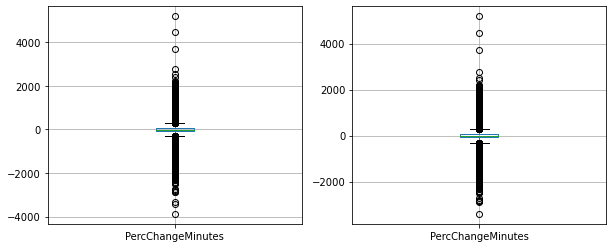

<AxesSubplot:>

<AxesSubplot:>

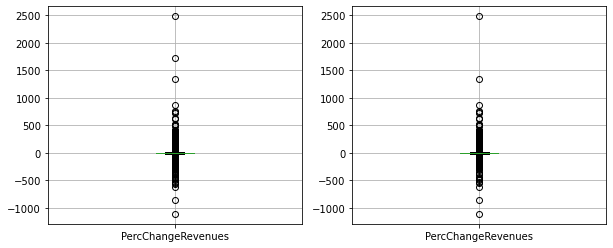

<AxesSubplot:>

<AxesSubplot:>

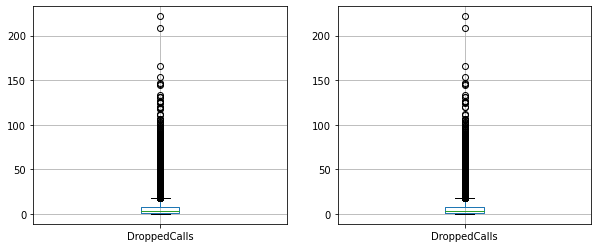

<AxesSubplot:>

<AxesSubplot:>

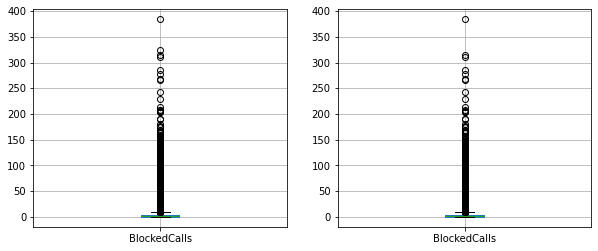

<AxesSubplot:>

<AxesSubplot:>

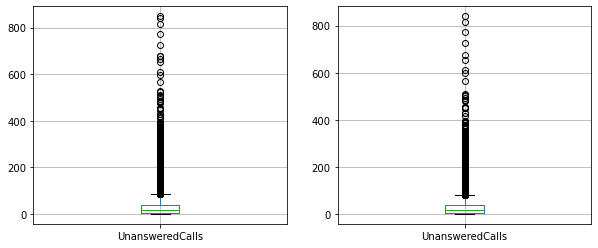

<AxesSubplot:>

<AxesSubplot:>

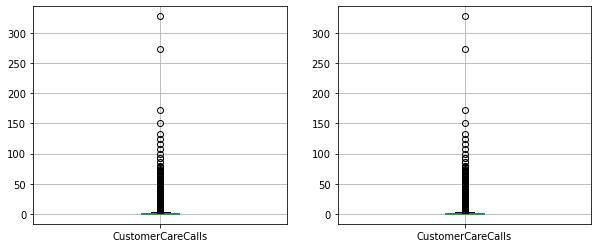

<AxesSubplot:>

<AxesSubplot:>

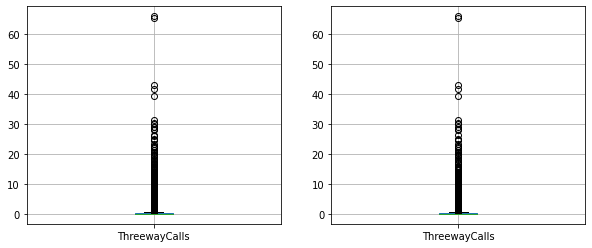

<AxesSubplot:>

<AxesSubplot:>

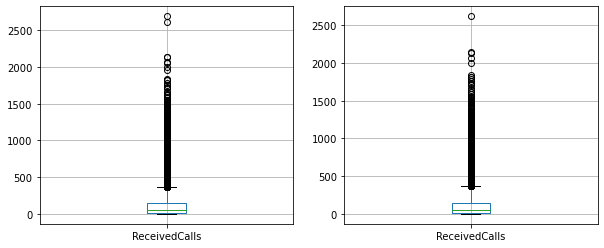

<AxesSubplot:>

<AxesSubplot:>

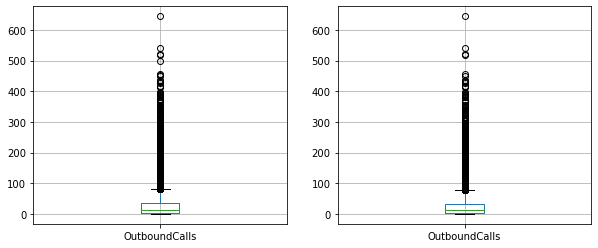

<AxesSubplot:>

<AxesSubplot:>

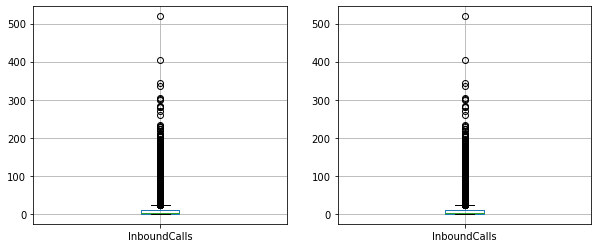

<AxesSubplot:>

<AxesSubplot:>

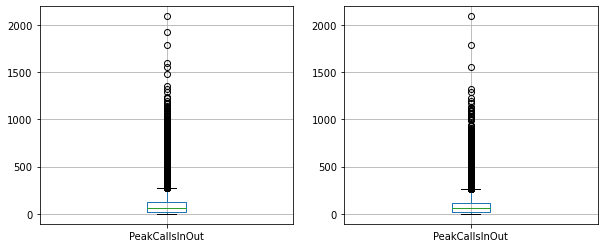

<AxesSubplot:>

<AxesSubplot:>

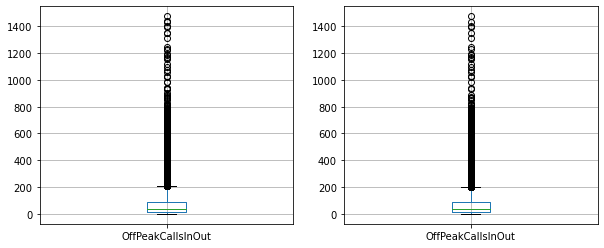

<AxesSubplot:>

<AxesSubplot:>

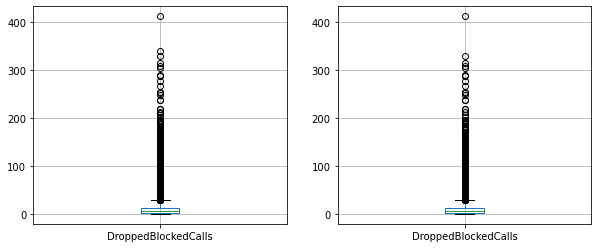

<AxesSubplot:>

<AxesSubplot:>

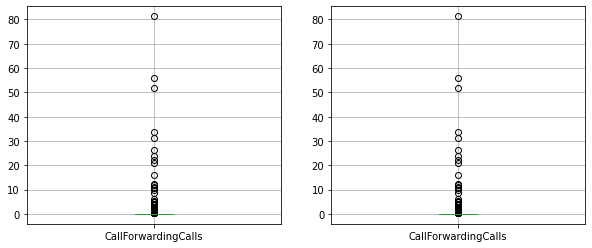

<AxesSubplot:>

<AxesSubplot:>

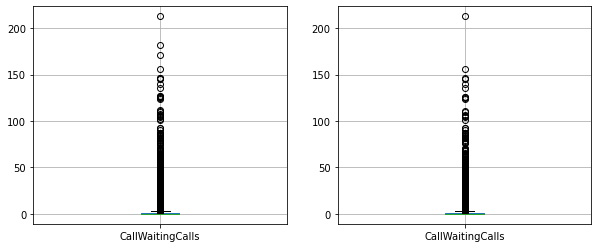

<AxesSubplot:>

<AxesSubplot:>

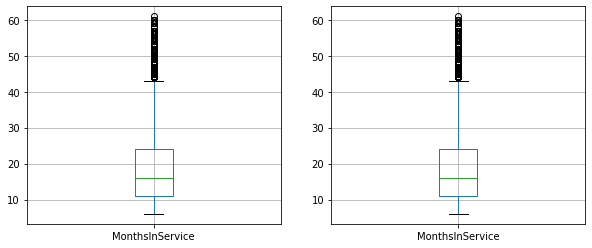

<AxesSubplot:>

<AxesSubplot:>

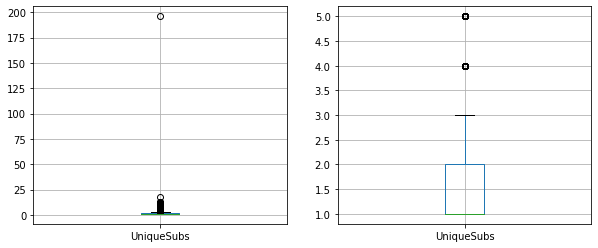

<AxesSubplot:>

<AxesSubplot:>

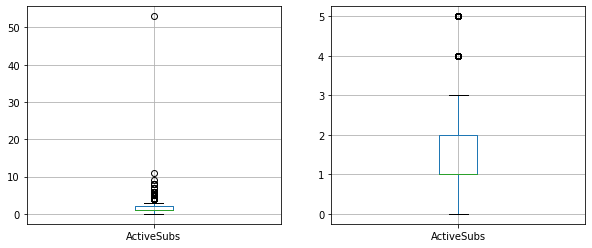

<AxesSubplot:>

<AxesSubplot:>

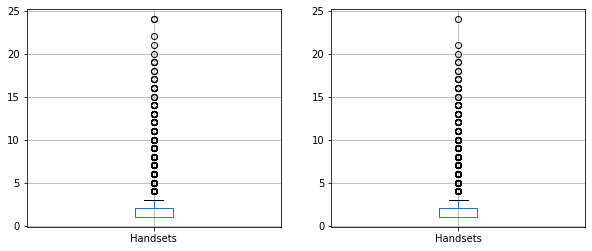

<AxesSubplot:>

<AxesSubplot:>

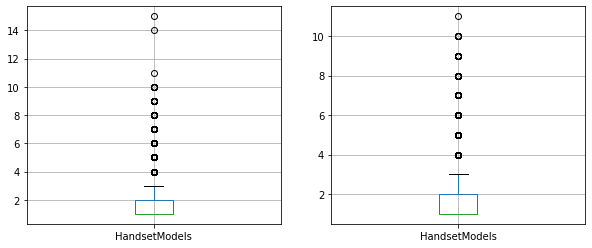

<AxesSubplot:>

<AxesSubplot:>

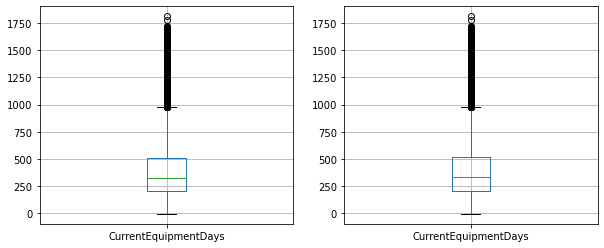

<AxesSubplot:>

<AxesSubplot:>

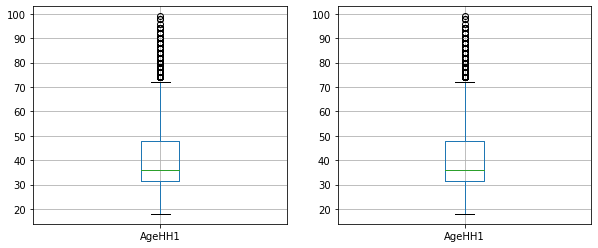

<AxesSubplot:>

<AxesSubplot:>

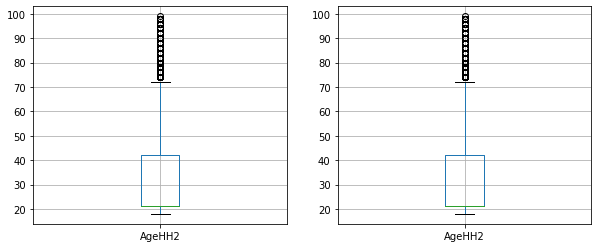

<AxesSubplot:>

<AxesSubplot:>

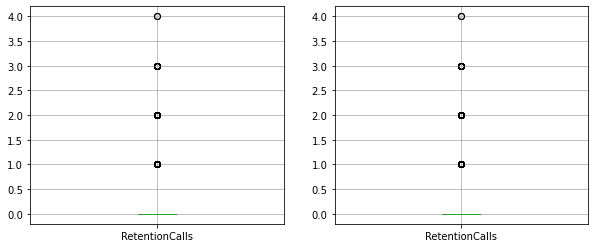

<AxesSubplot:>

<AxesSubplot:>

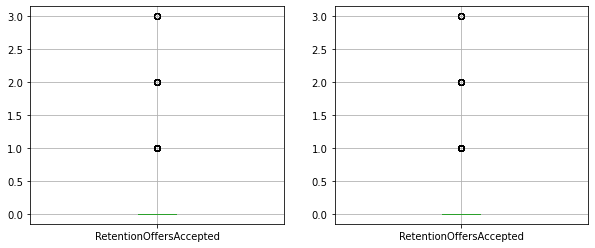

<AxesSubplot:>

<AxesSubplot:>

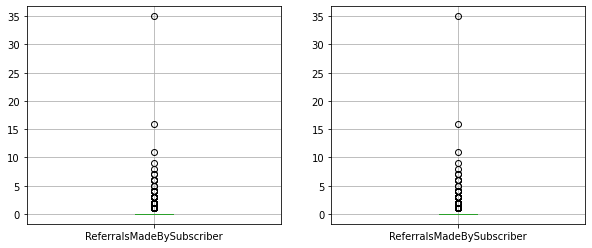

<AxesSubplot:>

<AxesSubplot:>

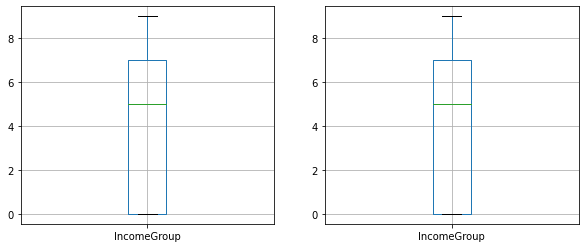

<AxesSubplot:>

<AxesSubplot:>

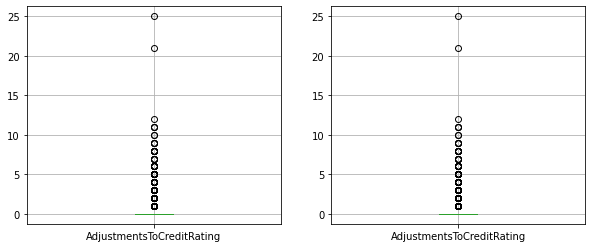

In [148]:
numeric_columns = cust_df.select_dtypes(include=np.number).columns
numeric_columns

for col in cust_df[numeric_columns]:
    fig, ax = plt.subplots(ncols=2 , figsize=(10,4))
    cust_df.boxplot(col, ax=ax[0])
    cust_df_remove_out.boxplot(col, ax=ax[1])
    
    plt.show()

In [149]:
cust_df = cust_df_remove_out

## 2.1 Performing exploratory analysis to analyze customer churn

Here are a few questions to consider regarding the dataset

### Does customers with high overage minutes also have high revenue?

Text(0.5, 1.0, 'Overage Minutes vs High Revenue')

Text(0.5, 0, 'Monthly Revenue')

Text(0, 0.5, 'OverageMinutes')

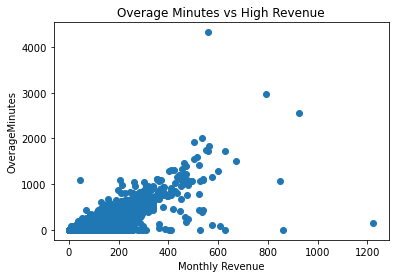

In [150]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
y = cust_df['OverageMinutes']
x = cust_df['MonthlyRevenue']
plt.scatter(x,y)
plt.title("Overage Minutes vs High Revenue")
plt.xlabel('Monthly Revenue')
plt.ylabel('OverageMinutes')
plt.show()

Disregarding the outliers, majority of customers with high overage minutes also have higher revenue. However, these only applies to a range of customers of Monthly Revenue between 0 - 400. Customers above Monthly Revenue of 400 may not follow this pattern anymore.

### 2.2 Does high number of active subscribers lead to low monthly revenue?

<mark>__Result:__
    
As shown in the chart below, other than ActiveSub = 0, it shows that high number of active subscribers lead to low monthly revenue.

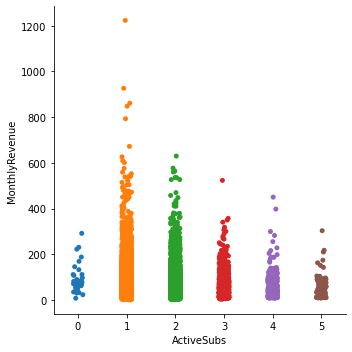

In [151]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(data = cust_df, x = 'ActiveSubs', y = 'MonthlyRevenue', kind = 'strip')

### 2.3 Does credit rating have an impact in churn rate?

In [152]:
# Calculate the churn rate

churnrate = cust_df[['CreditRating','Churn']].pivot_table(index='CreditRating', columns='Churn', aggfunc=len).apply(
    lambda r: r/r.sum(), axis=1)

churnrate

Churn,No,Yes
CreditRating,,
1-Highest,0.692699,0.307301
2-High,0.700314,0.299686
3-Good,0.692486,0.307514
4-Medium,0.742508,0.257492
5-Low,0.782829,0.217171
6-VeryLow,0.732176,0.267824
7-Lowest,0.714010,0.285990


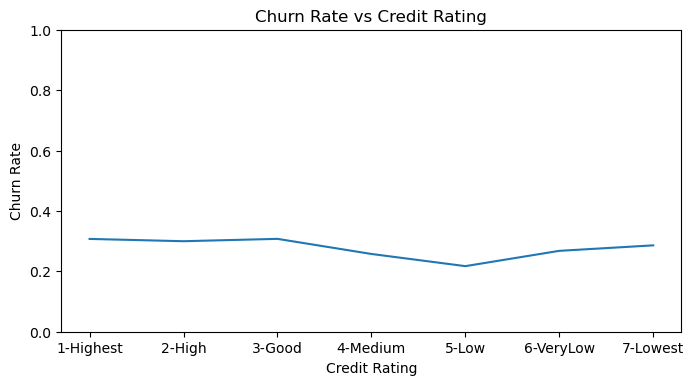

In [153]:
plt.figure(figsize=(8,4),dpi=100)
sns.lineplot(data=churnrate['Yes'])
plt.xlabel('Credit Rating')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs Credit Rating')
plt.ylim(0,1);

##### As shown above, there is no significant correlation between Churn Rate and Credit Rating.

### 2.4 Do the dataset have imbalance classes?

In [154]:
cust_df['Churn'].value_counts()

No     35663
Yes    14293
Name: Churn, dtype: int64

#### As we can observe, there is data imbalance between Churn 'Yes' and 'No', where the churn classes are not represented equally. This can affect our model prediction. Thus, we recommend using random undersampling to address the data imbalance.

In [155]:
# Due to data imbalance, we recommend using random undersampling to resolve this issue.

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter(cust_df['Churn']))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(cust_df, cust_df['Churn'])
print('Resampled dataset shape %s' % Counter(y_res))
X_res.shape

Original dataset shape Counter({'No': 35663, 'Yes': 14293})
Resampled dataset shape Counter({'No': 14293, 'Yes': 14293})


(28586, 58)

In [156]:
# Drop customerID feature.
cust_df2 = X_res.drop(columns='CustomerID', axis = 1)

## 3. Create additional features to help predict churn

In [157]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    cust_df['perc_active_subs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']=cust_df['TotalRecurringCharge']/ cust_df['MonthlyRevenue']
    cust_df['perc_recurrent_charge']

    return cust_df

In [158]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df2=create_features(cust_df2)
cust_df2.select_dtypes(include='number').columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'perc_active_subs', 'perc_recurrent_charge'],
      dtype='object')

In [159]:
# Looping through the columns to get unique values per column. ServiceArea has too many unique number, suggest to use 1st 3 numbers as bins.
for i in cust_df2.columns:
    print(f"Unique {i}'s count: {cust_df2[i].nunique()}")
    print(f"{cust_df2[i].unique()}\n")

Unique Churn's count: 2
['No' 'Yes']

Unique MonthlyRevenue's count: 9790
[149.86  32.95  42.49 ...  84.71  87.86 534.93]

Unique MonthlyMinutes's count: 2319
[1831.  206.  743. ... 2796. 3385. 4719.]

Unique TotalRecurringCharge's count: 181
[ 60.  45.  41.  10.  40.  32.  30.  77.  78.  16.  50.  55.  70.  56.
  25.  52.  46.  75.  90.  15.  61.  48.   6.  85.  33.  37.  80.  17.
  95.  43.  35.  54.  81.  42.  34.  57.  88. 100.  83.  87.  65.  27.
 105.  62.  64.  47.  71.  38.  29.   0.  20.  51.   5.  36.  39.  22.
  72. 130.  31. 120. 110.  59.  99.  63.  26.   8.  86.  97. 103.  68.
  44.  21.  58. 101.  24.  49.  92. 114. 140.  67.  13.  53.  73. 104.
  19.  82.  74.  79. 281.   4. 107.  76. 117.  69. 160.   7.  89.  28.
  23.  66. 102.  18. 121. 126.  91. 150. 122. 115.  98. 106.  12.  94.
 170. 145.  96.   9. 112. 124. 151.  84. 161.   1. 129. 109. 127. 175.
 210. 118.  93. 119.  14.   2.  11. 155. 182. 165. 200. 262. 148. 137.
   3. 132. 143. 134. 144. 139. 123. 111. 131. 1

In [160]:
# Label encoding for nominal columns.
features_le = ['CreditRating']

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'7-Lowest': 0, '6-VeryLow': 1, '5-Low': 2, '4-Medium': 3, '3-Good': 4, '2-High': 5, '1-Highest': 6 })
    return       

label_encoding(['CreditRating'], cust_df2)

cust_df2['CreditRating']

0        3
1        5
2        5
3        3
4        2
        ..
28581    5
28582    4
28583    3
28584    6
28585    2
Name: CreditRating, Length: 28586, dtype: int64

In [161]:
# Label encoding for target variable.

def label_encoding2(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return       

label_encoding2(['Churn'], cust_df2)


In [162]:
# Columns have too many unknown values affecting the reliability of the feature. Hence, suggest to drop.
cust_df2.drop(['MaritalStatus', 'HandsetPrice'], axis = 1, inplace=True)

In [163]:
# Too many unique values, propose to categorise under 1st 3 digits.
cust_df2['ServiceArea'] = cust_df['ServiceArea'].str[:3]

In [164]:
# One-Hot-Encoding for identified columns.
features_ohe = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
               'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
               'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'PrizmCode', 'Occupation',
               'ServiceArea']

cust_df3 = pd.get_dummies(cust_df2, columns=features_ohe) 

In [165]:
#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

features_sc = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'RetentionCalls', 'RetentionOffersAccepted',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating',
       'perc_active_subs', 'perc_recurrent_charge']
df_features_sc = pd.DataFrame(cust_df3, columns=features_sc)
df_remaining_features = cust_df3.drop(columns=features_sc)

rescaled_features = sc.fit_transform(df_features_sc)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_sc, index=df_remaining_features.index)

cust_df3 = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

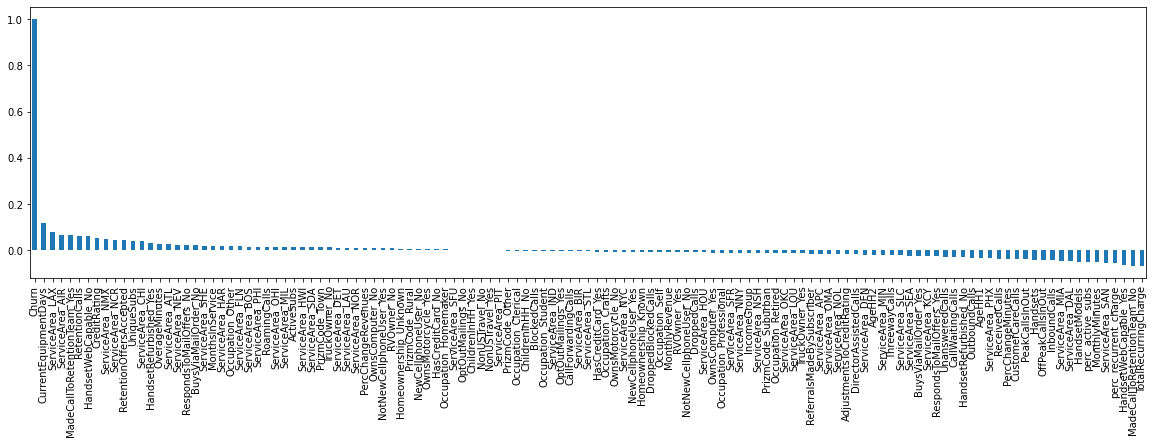

In [166]:
# Show correlation plot for correlation of Churn with each of the remaining features.
plt.figure(figsize=(16,10))
cust_df3.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5));

#### Current Equipment Days has the highest correlation towards Churn.

## 4. Build classification model to predict customer churn month in advance

### 4.1 Initial data processing for model building: Always split the data into training the model and testing the model

In [167]:
#Applying sklearn's splitter function train_test_split 
from sklearn.model_selection import train_test_split

X1 = cust_df3.drop('Churn', axis=1)
X = X1.values
y = cust_df3['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 4.2 Consider using (Principal Component Analysis) PCA when the dimensions of the input featuers are high
PCA converts the entire feature set into principal components that are linearly independent to each other and they maintain similar variation in the model. Suggest to improve the model further as a cost of lower Accuracy.

In [168]:
from sklearn.decomposition import PCA

my_pca = PCA(n_components = 10)
my_pca.fit(X_train)
my_pca.explained_variance_ratio_

PCA(n_components=10)

array([0.198604  , 0.07895344, 0.05152748, 0.04717702, 0.04081688,
       0.03813671, 0.0378684 , 0.03347898, 0.03177484, 0.03013623])

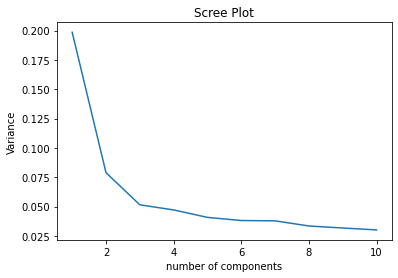

Suggest to use n_components = 6 as shown in the Scree Plot.


In [169]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x1 = range(len(comps))
    x1 = [y1 + 1 for y1 in x1]
    plt.plot(x1, comps)
    plt.title("Scree Plot")
    plt.xlabel("number of components")
    plt.ylabel("Variance")
    plt.show()
    
plot_explained(my_pca) # Scree plot
print('Suggest to use n_components = 6 as shown in the Scree Plot.')

In [170]:
my_pca = PCA(n_components = 6)
my_pca.fit(X_train)

PCA(n_components=6)

#### 4.3 Creating functions to measure feature metrics for classification model

In [171]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score

In [172]:
# Define a function that plots the feature weights for a classifier.
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)
    
    top_weights_selected = weights[:20]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")
    
    bottom_weights_selected = weights[-20:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")
    
    return print("")

In [173]:
# Define a function that plots the confusion matrix for a classifier and the train and test accuracy
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [174]:
# Define a function that plots the ROC curve and the AUC score
from numpy import sqrt
from numpy import argmax

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    
    # calculate the g-mean for each threshold
    gmeans = sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.legend()
    plt.show()
    
    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [175]:
# Define a function that plots the precision-recall-curve and the F1 score and AUC score
from numpy import arange

def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    
    
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    plt.legend()
    plt.show()
    
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    
    # define thresholds
    thresholds = arange(0, 1, 0.001)
    # evaluate each threshold
    scores = [f1_score(y_test, to_labels(y_pred_prob, t)) for t in thresholds]
    # get best threshold
    ix = argmax(scores)
    print('Modified with Best Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))
    
    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [176]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression

# Instanciate and train the logistic regression model based on the training set.
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [177]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)


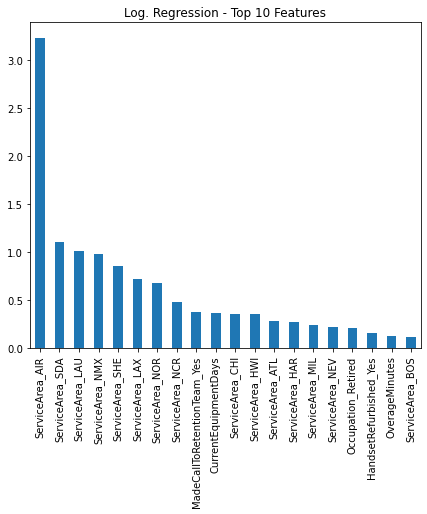

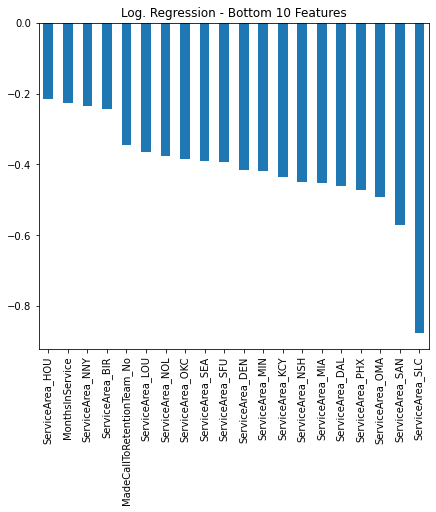

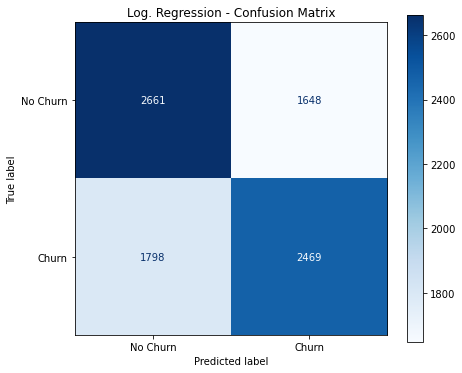

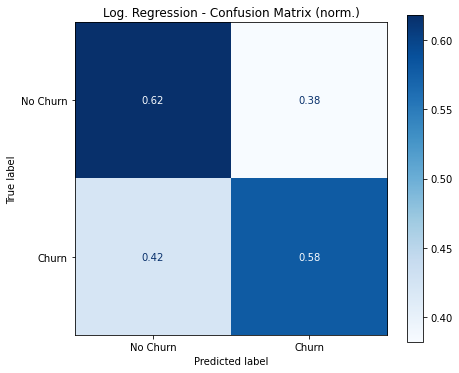

Accuracy Score Test: 0.5981809701492538
Accuracy Score Train: 0.6106446776611694 (as comparison)

Best Threshold=0.500214, G-Mean=0.598


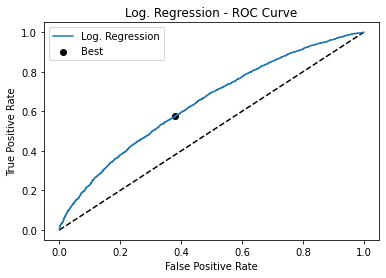

AUC Score (ROC): 0.6432737644564603

Best Threshold=0.342516, F-Score=0.674


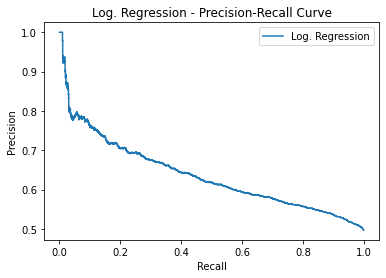

Modified with Best Threshold=0.343, F-Score=0.67412
F1 Score: 0.5889790076335878 
AUC Score (PR): 0.6370163950144259



In [178]:
# Plot model evaluations.
feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')

In [179]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
roc_auc = auc(fpr, tpr)
GINI = (2 * roc_auc) - 1
print(GINI)

0.19617134372969125


### To summarise:
Accuracy Score Test: 0.5981
<br>
AUC Score (ROC): 0.6432
<br>
Default Threshold: 0.5 --> 0.34 (best)
<br>
F-Score: 0.588 --> 0.674
<br>
Gini: 0.196

Model not advisable to be used as Accuracy score is below 60%. 

#### 4.2 Using Hyperparameter to improve Log Regression model (For training purposes, max iterations is reduced for faster code runtime on GridSearchCV)

In [180]:
# Hyperparameter to optimise the log reg model
from sklearn.model_selection import GridSearchCV
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=5, random_state=42)               # Reduce the size to make the code faster to run
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5, random_state=42,
                                          solver='saga'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'penalty': ['l1', 'l2']})

Logistic Regression - Best Parameters:  {'C': 3.1, 'penalty': 'l2'}


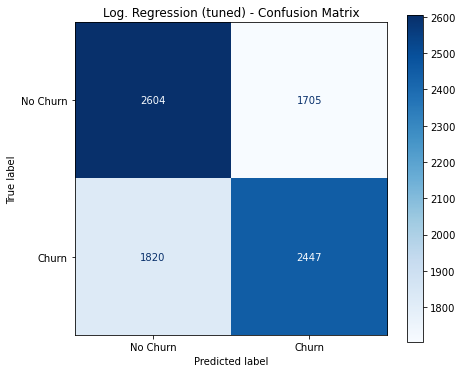

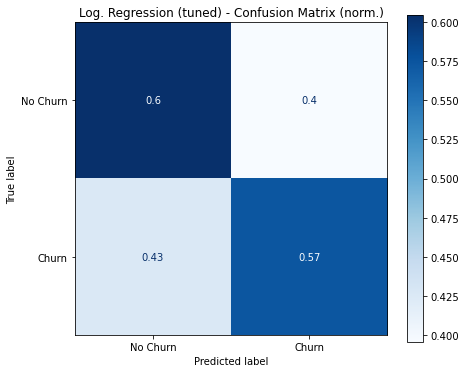

Accuracy Score Test: 0.5889692164179104
Accuracy Score Train: 0.5927536231884057 (as comparison)

Best Threshold=0.491058, G-Mean=0.590


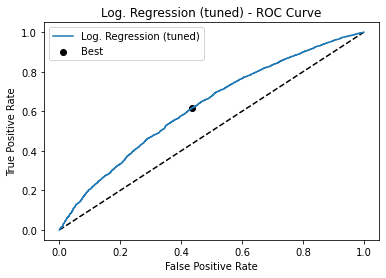

AUC Score (ROC): 0.6240463453001368

Best Threshold=0.358440, F-Score=0.669


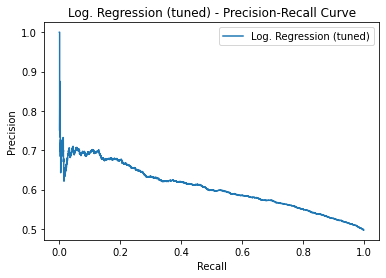

Modified with Best Threshold=0.358, F-Score=0.66892
F1 Score: 0.5813041928970186 
AUC Score (PR): 0.6048748378336024



In [181]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')

In [182]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_tuned)
roc_auc = auc(fpr, tpr)
GINI = (2 * roc_auc) - 1
print(GINI)

0.17778736935457506


#### To summarise:
Accuracy Score Test: 0.5889
<br>
AUC Score (ROC): 0.624
<br>
Default Threshold: 0.5 --> 0.358 (best)
<br>
F-Score: 0.5813 --> 0.6689
<br>
Gini: 0.1777

Model with GridSearchCV performed worse due to small number of iterations to improve performance. We used this model to test our knowledge rather to optimise performance as the model code takes too long to run.

### 4.3 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [183]:
#-------------------------------- Model training -------------------------------#
from sklearn.ensemble import RandomForestClassifier
#type your code to build random forest classifier model on training data set
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

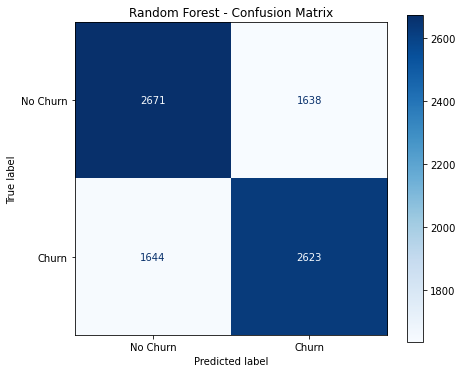

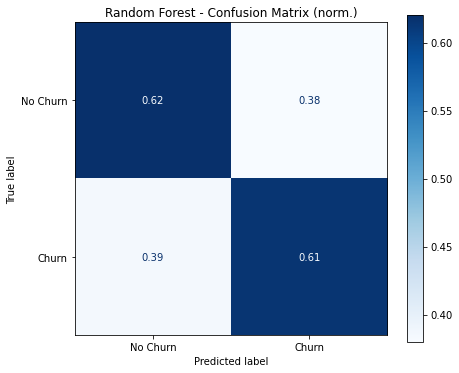

Accuracy Score Test: 0.617304104477612
Accuracy Score Train: 1.0 (as comparison)

Best Threshold=0.500000, G-Mean=0.618


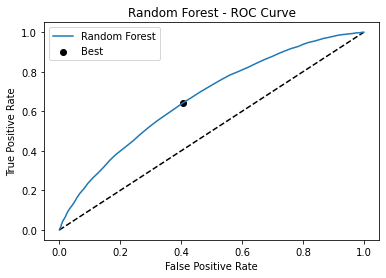

AUC Score (ROC): 0.6673775051188363

Best Threshold=0.350000, F-Score=0.684


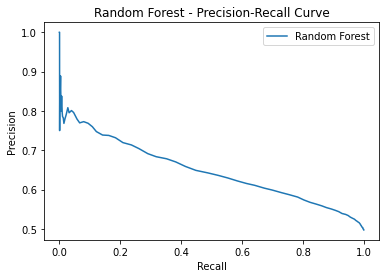

Modified with Best Threshold=0.341, F-Score=0.68359
F1 Score: 0.6151500938086303 
AUC Score (PR): 0.6481197647637522



In [184]:
# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
GINI = (2 * roc_auc) - 1
print(GINI)

0.2345829981916625


#### To summarise:

Accuracy Score Test: 0.6173
<br>
AUC Score (ROC): 0.6673
<br>
Default Threshold: 0.5 --> 0.341 (best)
<br>
F-Score: 0.6151 --> 0.6836
<br>
Gini: 0.2345

Performed better than Log Reg model. Accuracy is above 60% and F-Score is close to 70%, indicating better model's accuracy on the test dataset.

#### 4.4 Using Hyperparameter RandomizedSearchCV

In [186]:
from sklearn.model_selection import RandomizedSearchCV

#Define parameter grid for RandomizedSearch and instanciate and train model.
param_grid_rf = {'n_estimators': np.arange(10, 100, 10), 
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 100, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0, random_state=42)
rf_random_grid.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42)

Random Forest - Best Parameters:  {'n_estimators': 90, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'entropy', 'bootstrap': False}


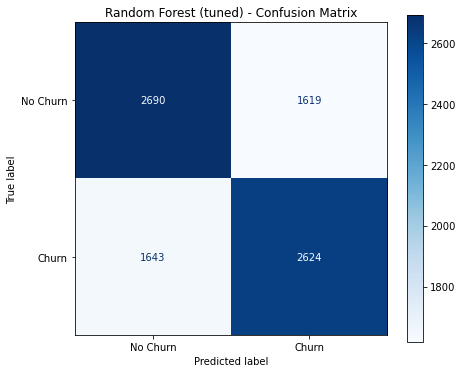

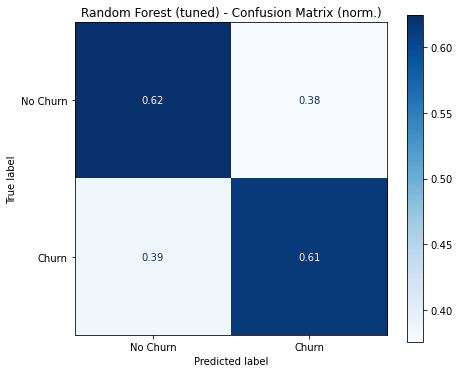

Accuracy Score Test: 0.6196361940298507
Accuracy Score Train: 1.0 (as comparison)

Best Threshold=0.482963, G-Mean=0.621


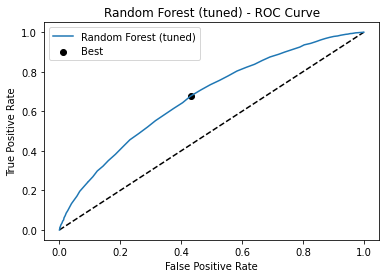

AUC Score (ROC): 0.6708396099029815

Best Threshold=0.333333, F-Score=0.681


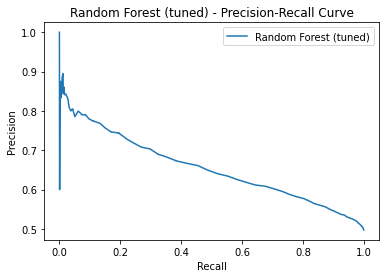

Modified with Best Threshold=0.323, F-Score=0.68128
F1 Score: 0.6166862514688602 
AUC Score (PR): 0.6554622200941245



In [187]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, y_pred_rf_tuned, 'Random Forest (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest (tuned)')

In [188]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_tuned)
roc_auc = auc(fpr, tpr)
GINI = (2 * roc_auc) - 1
print(GINI)

0.23922673060777244


### To summarise: (Best Model RandomForestClassifier with RandomSearchCV)

Accuracy Score Test: 0.6196
<br>
AUC Score (ROC): 0.6708
<br>
Default Threshold: 0.5 --> 0.323 (best)
<br>
F-Score: 0.6163 --> 0.6813
<br>
Gini: 0.2392

Performed the best, F-Score is the highest and is close to 70%, indicating best model's accuracy on the test dataset.

### VS
    
(Log Regression)
Accuracy Score Test: 0.5981
<br>
AUC Score (ROC): 0.6432
<br>
Default Threshold: 0.5 --> 0.34 (best)
<br>
F-Score: 0.588 --> 0.674
<br>
Gini: 0.196

#### From the comparison above, all metrics in our Random Forest Model (Acc, AUC, F-Score, Gini) score better than the Log Reg Model. Thus, we shall use the Random Forest Model for our prediction.

### Q4.3 Identify most important features impacting churn

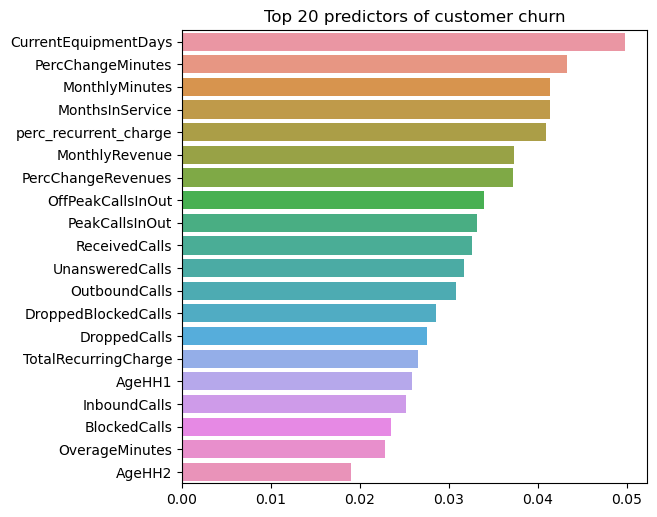

In [189]:
# extract the features with the largest coefficient from random forest model
top_predictors = pd.Series(rf_random_grid.best_estimator_.feature_importances_, index=X1.columns)

# sort values in desc order
top_20_predictors = top_predictors.nlargest(20)

# plotting the top 20 predictors
plt.figure(figsize=(6,6), dpi = 100)
sns.barplot(y = top_20_predictors.index,
            x = top_20_predictors.values)
plt.title('Top 20 predictors of customer churn');

#### Results:
1. From the chart above, we can see the best Feature is Current Equipment Days, followed by PerChangeMinutes. However, the coefficients are rather low at around 0.05. 
2. These top 5 features are mainly the tenure and usages of the customer. Thus, long-term customers with heavy usage could be our targeted group for cross-selling & up-selling marketing to increase further revenue and promote retention loyalty.

## 5. Use the hold out data provided to predict churners using the best model identified in step 4 
We have to read the hold out data from csv into dataframe and repeat the earlier steps to make the data consistent (same rows as the data trained in the model) before predicting with the RandomForest Model

In [190]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4
df = pd.read_csv('Mini project 3 Hold Out Data.csv')

df2 = df.drop(columns='Churn', axis =1 ) 
df3 = df2.dropna(axis=0) # % of nulls less than 5%, suggest to drop

# Drop columns that we have dropped earlier.
df4 = df3.drop(['CustomerID', 'MaritalStatus', 'HandsetPrice'], axis=1)

# Create features
df5 = create_features(df4)

# Modified ServiceArea 
df5['ServiceArea'] = df5['ServiceArea'].str[:3]

# Encoding
label_encoding(['CreditRating'], df5)

df6 = pd.get_dummies(df5, columns=features_ohe) 

# StandardScaling
df_features_sc = pd.DataFrame(df6, columns=features_sc)
df_remaining_features = df6.drop(columns=features_sc)
rescaled_features = sc.fit_transform(df_features_sc)
df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_sc, index=df_remaining_features.index)

df7 = pd.concat([df_remaining_features, df_rescaled_features], axis=1)
#Use "predict" function on the transformend data using the best fitted model object



In [191]:
# scaled created a null row to be removed
df8 = df7.dropna(axis=0)

In [192]:
# Difference in column numbers unable to fit inside the model. Following steps to identify and reconcile the differences.
df8.shape
X_train.shape

print(df7.columns.tolist())

(19528, 136)

(20010, 124)

['CreditRating', 'ChildrenInHH_No', 'ChildrenInHH_Yes', 'HandsetRefurbished_No', 'HandsetRefurbished_Yes', 'HandsetWebCapable_No', 'HandsetWebCapable_Yes', 'TruckOwner_No', 'TruckOwner_Yes', 'RVOwner_No', 'RVOwner_Yes', 'Homeownership_Known', 'Homeownership_Unknown', 'BuysViaMailOrder_No', 'BuysViaMailOrder_Yes', 'RespondsToMailOffers_No', 'RespondsToMailOffers_Yes', 'OptOutMailings_No', 'OptOutMailings_Yes', 'NonUSTravel_No', 'NonUSTravel_Yes', 'OwnsComputer_No', 'OwnsComputer_Yes', 'HasCreditCard_No', 'HasCreditCard_Yes', 'NewCellphoneUser_No', 'NewCellphoneUser_Yes', 'NotNewCellphoneUser_No', 'NotNewCellphoneUser_Yes', 'OwnsMotorcycle_No', 'OwnsMotorcycle_Yes', 'MadeCallToRetentionTeam_No', 'MadeCallToRetentionTeam_Yes', 'PrizmCode_Other', 'PrizmCode_Rural', 'PrizmCode_Suburban', 'PrizmCode_Town', 'Occupation_Clerical', 'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Professional', 'Occupation_Retired', 'Occupation_Self', 'Occupation_Student', 'ServiceAr

In [193]:
df8_list = ['CreditRating', 'ChildrenInHH_No', 'ChildrenInHH_Yes', 'HandsetRefurbished_No', 'HandsetRefurbished_Yes', 
 'HandsetWebCapable_No', 'HandsetWebCapable_Yes', 'TruckOwner_No', 'TruckOwner_Yes', 'RVOwner_No', 'RVOwner_Yes', 
 'Homeownership_Known', 'Homeownership_Unknown', 'BuysViaMailOrder_No', 'BuysViaMailOrder_Yes', 'RespondsToMailOffers_No',
 'RespondsToMailOffers_Yes', 'OptOutMailings_No', 'OptOutMailings_Yes', 'NonUSTravel_No', 'NonUSTravel_Yes', 'OwnsComputer_No',
 'OwnsComputer_Yes', 'HasCreditCard_No', 'HasCreditCard_Yes', 'NewCellphoneUser_No', 'NewCellphoneUser_Yes', 'NotNewCellphoneUser_No',
 'NotNewCellphoneUser_Yes', 'OwnsMotorcycle_No', 'OwnsMotorcycle_Yes', 'MadeCallToRetentionTeam_No', 'MadeCallToRetentionTeam_Yes',
 'PrizmCode_Other', 'PrizmCode_Rural', 'PrizmCode_Suburban', 'PrizmCode_Town', 'Occupation_Clerical', 'Occupation_Crafts',
 'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Professional', 'Occupation_Retired', 'Occupation_Self', 'Occupation_Student',
 'ServiceArea_AIR', 'ServiceArea_APC', 'ServiceArea_ATH', 'ServiceArea_ATL', 'ServiceArea_AWI', 'ServiceArea_BIR', 'ServiceArea_BOS',
 'ServiceArea_CHI', 'ServiceArea_DAL', 'ServiceArea_DEN', 'ServiceArea_DET', 'ServiceArea_FLN', 'ServiceArea_GCW', 'ServiceArea_HAR',
 'ServiceArea_HOU', 'ServiceArea_HWI', 'ServiceArea_IND', 'ServiceArea_INH', 'ServiceArea_INU', 'ServiceArea_IPM', 'ServiceArea_KCY',
 'ServiceArea_LAU', 'ServiceArea_LAW', 'ServiceArea_LAX', 'ServiceArea_LOU', 'ServiceArea_MIA', 'ServiceArea_MIL', 'ServiceArea_MIN',
 'ServiceArea_NCR', 'ServiceArea_NEV', 'ServiceArea_NMC', 'ServiceArea_NMX', 'ServiceArea_NNY', 'ServiceArea_NOL', 'ServiceArea_NOR',
 'ServiceArea_NSH', 'ServiceArea_NVU', 'ServiceArea_NYC', 'ServiceArea_OHH', 'ServiceArea_OHI', 'ServiceArea_OKC', 'ServiceArea_OMA',
 'ServiceArea_PHI', 'ServiceArea_PHX', 'ServiceArea_PIT', 'ServiceArea_SAN', 'ServiceArea_SDA', 'ServiceArea_SEA', 'ServiceArea_SEW',
 'ServiceArea_SFR', 'ServiceArea_SFU', 'ServiceArea_SHE', 'ServiceArea_SLC', 'ServiceArea_STL', 'ServiceArea_VAH', 'MonthlyRevenue',
 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes',
 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls',
 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'perc_active_subs',
 'perc_recurrent_charge']

In [194]:
print(X1.columns.tolist())

['CreditRating', 'ChildrenInHH_No', 'ChildrenInHH_Yes', 'HandsetRefurbished_No', 'HandsetRefurbished_Yes', 'HandsetWebCapable_No', 'HandsetWebCapable_Yes', 'TruckOwner_No', 'TruckOwner_Yes', 'RVOwner_No', 'RVOwner_Yes', 'Homeownership_Known', 'Homeownership_Unknown', 'BuysViaMailOrder_No', 'BuysViaMailOrder_Yes', 'RespondsToMailOffers_No', 'RespondsToMailOffers_Yes', 'OptOutMailings_No', 'OptOutMailings_Yes', 'NonUSTravel_No', 'NonUSTravel_Yes', 'OwnsComputer_No', 'OwnsComputer_Yes', 'HasCreditCard_No', 'HasCreditCard_Yes', 'NewCellphoneUser_No', 'NewCellphoneUser_Yes', 'NotNewCellphoneUser_No', 'NotNewCellphoneUser_Yes', 'OwnsMotorcycle_No', 'OwnsMotorcycle_Yes', 'MadeCallToRetentionTeam_No', 'MadeCallToRetentionTeam_Yes', 'PrizmCode_Other', 'PrizmCode_Rural', 'PrizmCode_Suburban', 'PrizmCode_Town', 'Occupation_Clerical', 'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Professional', 'Occupation_Retired', 'Occupation_Self', 'Occupation_Student', 'ServiceAr

In [195]:
X1_list = ['CreditRating', 'ChildrenInHH_No', 'ChildrenInHH_Yes', 'HandsetRefurbished_No', 'HandsetRefurbished_Yes', 'HandsetWebCapable_No', 'HandsetWebCapable_Yes', 'TruckOwner_No', 'TruckOwner_Yes', 'RVOwner_No', 'RVOwner_Yes', 'Homeownership_Known', 'Homeownership_Unknown', 'BuysViaMailOrder_No', 'BuysViaMailOrder_Yes', 'RespondsToMailOffers_No', 'RespondsToMailOffers_Yes', 'OptOutMailings_No', 'OptOutMailings_Yes', 'NonUSTravel_No', 'NonUSTravel_Yes', 'OwnsComputer_No', 'OwnsComputer_Yes', 'HasCreditCard_No', 'HasCreditCard_Yes', 'NewCellphoneUser_No', 'NewCellphoneUser_Yes', 'NotNewCellphoneUser_No', 'NotNewCellphoneUser_Yes', 'OwnsMotorcycle_No', 'OwnsMotorcycle_Yes', 'MadeCallToRetentionTeam_No', 'MadeCallToRetentionTeam_Yes', 'PrizmCode_Other', 'PrizmCode_Rural', 'PrizmCode_Suburban', 'PrizmCode_Town', 'Occupation_Clerical', 'Occupation_Crafts', 'Occupation_Homemaker', 'Occupation_Other', 'Occupation_Professional', 'Occupation_Retired', 'Occupation_Self', 'Occupation_Student', 'ServiceArea_AIR', 'ServiceArea_APC', 'ServiceArea_ATL', 'ServiceArea_BIR', 'ServiceArea_BOS', 'ServiceArea_CHI', 'ServiceArea_DAL', 'ServiceArea_DEN', 'ServiceArea_DET', 'ServiceArea_FLN', 'ServiceArea_HAR', 'ServiceArea_HOU', 'ServiceArea_HWI', 'ServiceArea_IND', 'ServiceArea_KCY', 'ServiceArea_LAU', 'ServiceArea_LAX', 'ServiceArea_LOU', 'ServiceArea_MIA', 'ServiceArea_MIL', 'ServiceArea_MIN', 'ServiceArea_NCR', 'ServiceArea_NEV', 'ServiceArea_NMX', 'ServiceArea_NNY', 'ServiceArea_NOL', 'ServiceArea_NOR', 'ServiceArea_NSH', 'ServiceArea_NYC', 'ServiceArea_OHI', 'ServiceArea_OKC', 'ServiceArea_OMA', 'ServiceArea_PHI', 'ServiceArea_PHX', 'ServiceArea_PIT', 'ServiceArea_SAN', 'ServiceArea_SDA', 'ServiceArea_SEA', 'ServiceArea_SFR', 'ServiceArea_SFU', 'ServiceArea_SHE', 'ServiceArea_SLC', 'ServiceArea_STL', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'perc_active_subs', 'perc_recurrent_charge']

In [196]:
# To identify differnces in columns

# prints the missing and additional elements in list2 
print("Missing values in second list:", (set(X1_list).difference(df8_list)))
print("Additional values in second list:", (set(df8_list).difference(X1_list)))
  
# prints the missing and additional elements in list1
print("Missing values in first list:", (set(df8_list).difference(X1_list)))
print("Additional values in first list:", (set(X1_list).difference(df8_list)))

Missing values in second list: set()
Additional values in second list: {'ServiceArea_NMC', 'ServiceArea_ATH', 'ServiceArea_OHH', 'ServiceArea_SEW', 'ServiceArea_IPM', 'ServiceArea_GCW', 'ServiceArea_VAH', 'ServiceArea_NVU', 'ServiceArea_INU', 'ServiceArea_LAW', 'ServiceArea_INH', 'ServiceArea_AWI'}
Missing values in first list: {'ServiceArea_NMC', 'ServiceArea_ATH', 'ServiceArea_OHH', 'ServiceArea_SEW', 'ServiceArea_IPM', 'ServiceArea_GCW', 'ServiceArea_VAH', 'ServiceArea_NVU', 'ServiceArea_INU', 'ServiceArea_LAW', 'ServiceArea_INH', 'ServiceArea_AWI'}
Additional values in first list: set()


In [197]:
cols_drop = ['ServiceArea_GCW', 'ServiceArea_NMC', 'ServiceArea_VAH', 'ServiceArea_INU', 'ServiceArea_LAW',
 'ServiceArea_IPM', 'ServiceArea_OHH', 'ServiceArea_SEW', 'ServiceArea_AWI', 'ServiceArea_INH',
 'ServiceArea_ATH', 'ServiceArea_NVU']
#{'ServiceArea_GCW', 'ServiceArea_NMC', 'ServiceArea_VAH', 'ServiceArea_INU', 'ServiceArea_LAW',
# 'ServiceArea_IPM', 'ServiceArea_OHH', 'ServiceArea_SEW', 'ServiceArea_AWI', 'ServiceArea_INH',
# 'ServiceArea_ATH', 'ServiceArea_NVU'}

In [198]:
# Reconile the differences.
df9 = df8.drop(columns= cols_drop, axis=1)

In [199]:
# Convert to array format for the model
dfx = df9.values

In [200]:
#Use "predict" function on the transformend data using the best fitted model object
predict_dfx = rf_random_grid.predict(dfx)

In [201]:
# Convert to DataFrame for better clarity
churners = pd.DataFrame(predict_dfx, columns=['Churn'])
churners.sum()
churners.count()
print('The Churnrate is :', churners.sum().values/len(churners) *100)

Churn    9481
dtype: int64

Churn    19528
dtype: int64

The Churnrate is : [48.55079885]


#### As shown above, the churn rate is 48.92% using the hold out data on the RandomForest model trained with hyperparameters.